In [ ]:
#Collection of files
import tensorflow as tf
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")
#tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
y_test.shape


(60000, 28, 28)
(10000, 28, 28)
(60000,)


(10000,)

In [ ]:
#data required for normalization
print(x_train.max())
print(x_test.max())

255
255


In [ ]:
#normalizateion
x_train_normalization=x_train/255
x_test_normalization=x_test/255
x_train_normalization.max()

1.0

In [ ]:
#Creation of ANN
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.2))
model.add(Dense(20,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 7.9521 - accuracy: 0.1502 - val_loss: 1.9623 - val_accuracy: 0.2608
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.0240 - accuracy: 0.2415 - val_loss: 1.5003 - val_accuracy: 0.4565
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6949 - accuracy: 0.3961 - val_loss: 1.2694 - val_accuracy: 0.5383
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.5175 - accuracy: 0.4473 - val_loss: 1.0646 - val_accuracy: 0.6018
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3785 - accuracy: 0.4944 - val_loss: 0.9904 - val_accuracy: 0.6153
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 1.3113 - accuracy: 0.5195 - val_loss: 0.9269 - val_accuracy: 0.6217
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.2460 - accuracy: 0.5394 - val_loss: 0.8857 - val_accuracy:

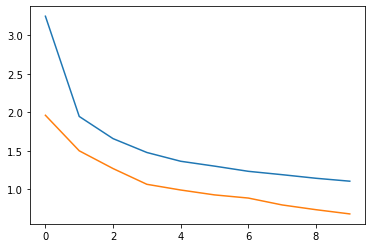

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
y_pred=model.predict_classes(x_test)
y_pred=np.argmax(y_pred)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


62

In [ ]:
#saving
model.save("part_1.hdf5")

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit-drawable-canvas --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 15.3MB/s 
     |████████████████████████████████| 4.2MB 29.3MB/s 
     |████████████████████████████████| 163kB 46.9MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 112kB 45.0MB/s 
     |████████████████████████████████| 122kB 53.8MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.4 which is incompatible.
     |████████████████████████████████| 1.3MB 17.8MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow import keras
import cv2
model=keras.models.load_model('/content/part_1.hdf5')
st.title('Number detection')

from streamlit_drawable_canvas import st_canvas
# Create a canvas component
canvas_result = st_canvas(stroke_width=10,stroke_color='#ffffff',background_color="#000000",
    height=150,width=150,drawing_mode='freedraw')
# Do something interesting with the image data and paths
if canvas_result.image_data is not None:
  I=cv2.resize(canvas_result.image_data.astype('uint8'),(28,28))
  rescaled=cv2.resize(I,(150,150),interpolation=cv2.INTER_NEAREST)
  st.write('Input by user')
  st.image(rescaled)
import numpy as np
if st.button('PREDICT'): 
  test_x=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
  value=model.predict(test_x.reshape(1,28,28))
  st.write(f'Prediction:{np.argmax(value[0])}')
  st.line_chart(value[0])

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://fa9b54eb7b65.ngrok.io'